# Final Submission

### Mengimport Library yang digunakan

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from datetime import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
print(tf.__version__)

2.0.0


### Mendfinisikan Directory, ukuran gambar, dan jumlah Epoch

In [3]:
root_dir = 'rps-cv-images'
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')
val_dir = os.path.join(root_dir, 'val')
image_size = (100,150)
height = 100
width = 150
depth = 3
epochs = 50
batch_size = 10

In [4]:
os.listdir(test_dir)

['paper', 'rock', 'scissors']

### Membuat ImageDataGenerator

In [5]:
image_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

### Meload Gambar

In [6]:
## Data Train
print('Data Train')
train_data = image_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

## Data Validasi
print('Data Validasi')
val_data = image_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

## Data Test
print('Data Test')
test_data = image_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Data Train
Found 1800 images belonging to 3 classes.
Data Validasi
Found 194 images belonging to 3 classes.
Data Test
Found 194 images belonging to 3 classes.


### Membuat Model Arsitektur CNN

In [7]:
def cnn(input_shape):
    name = 'cnn'
    model = Sequential(name=name)
    model.add(Conv2D(16, (3,3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(4,4))
    model.add(Dropout(0.25))
    model.add(Conv2D(16, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(16, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))
    model.add(Conv2D(16, (5,5), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(16, (5,5), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    return model

In [8]:
input_shape = (height, width, depth)
model = cnn(input_shape)

In [9]:
model.summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 16)       448       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 148, 16)       64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 37, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 37, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 35, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 35, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 33, 16)        2320    

In [10]:
def compile_and_fit(model, num_epochs):
    model.compile(
        loss= 'sparse_categorical_crossentropy', 
        optimizer= Adam(lr=1e-3, decay=1e-3 / num_epochs),
        metrics= ['accuracy']
    )

    history = model.fit(
        train_data,
        steps_per_epoch=100,
        epochs=num_epochs,
        validation_data=val_data,
        validation_steps=10,
        verbose=1
    )

    return history

### Melakukan Training Model

In [11]:
time_start = datetime.now()
model_history = compile_and_fit(model, epochs)
time_finish = datetime.now()
duration = time_finish - time_start

Train for 100 steps, validate for 10 steps
Epoch 1/50
100/100 [==============================] - 14s 141ms/step - loss: 0.9498 - accuracy: 0.5610 - val_loss: 1.7877 - val_accuracy: 0.3000
Epoch 2/50
100/100 [==============================] - 11s 112ms/step - loss: 0.4513 - accuracy: 0.8450 - val_loss: 2.5737 - val_accuracy: 0.3000
Epoch 3/50
100/100 [==============================] - 11s 111ms/step - loss: 0.2800 - accuracy: 0.9130 - val_loss: 3.0192 - val_accuracy: 0.3400
Epoch 4/50
100/100 [==============================] - 12s 117ms/step - loss: 0.2263 - accuracy: 0.9290 - val_loss: 2.0515 - val_accuracy: 0.5100
Epoch 5/50
100/100 [==============================] - 11s 114ms/step - loss: 0.1731 - accuracy: 0.9370 - val_loss: 0.9901 - val_accuracy: 0.7200
Epoch 6/50
100/100 [==============================] - 12s 124ms/step - loss: 0.1591 - accuracy: 0.9560 - val_loss: 0.2321 - val_accuracy: 0.9200
Epoch 7/50
100/100 [==============================] - 11s 110ms/step - loss: 0.1716 - a

In [12]:
print('Training Duration', str(duration))

Training Duration 0:13:02.944394


### Grafik perubahan epoch terhadap Akurasi

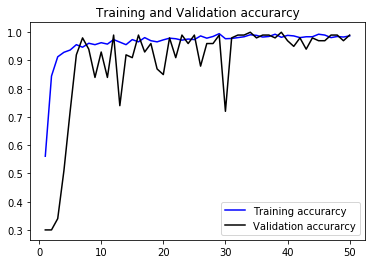

In [13]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'blue', label='Training accurarcy')
plt.plot(epochs, val_acc, 'black', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.show()

### Mengevaluasi Model

In [14]:
model.evaluate(test_data)

20/20 [==============================] - 2s 124ms/step - loss: 0.0126 - accuracy: 0.9948


[0.012591186526628917, 0.9948454]

### Kesimpulan

##### Akurasi Data Train    = 95.50%
##### Akurasi Data Validasi = 97.50%
##### Akurasi Data Test     = 96.39%
##### Durasi Train model    = xx menit xx detik


### Memprediksi Gambar

In [15]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# %matplotlib inline

# uploaded = files.upload()

# for fn in uploaded.keys():

#     # predicting images
#     path = fnf
#     img = image.load_img(path, target_size=image_size)
#     imgplot = plt.imshow(img)
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
    
#     images = np.vstack([x])
#     classes = model.predict(images, batch_size=batch_size)
    
#     print(fn)
#     if classes==0:
#         print('paper')
#     elif classes==1:
#         print('rock')
#     else:
#         print('scissors')